## Studying the role of superspreading events in a simple examples

To study it in compartment models, we split them into many compartments. We generalize the contact matrix to the simple two sub-compartments case as

$$
\tilde{C}_{ij}^{\alpha\beta}=\begin{pmatrix}r^{N}\tilde{C}_{ij} &  & r^{C}(t)\,\tilde{C}_{ij}^{O}\\
\\
r^{C}(t)\tilde{C}_{ij}^{O} &  & \bar{r}^{N}\,\tilde{C}_{ij}^{O}
\end{pmatrix}
$$

Thus, tuning the contact matrix by varing the parameter $r^C$ holds the key.

In [2]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
from scipy.io import loadmat
np.set_printoptions(precision=2)
plt.rcParams.update({'font.size': 26})

In [3]:
# get population in 4 age-groups: 0-20,20-40,40-60,60-80
M0=16;   Ni0 = pyross.utils.getPopulation("India", M0)
M=4; Ni=np.zeros(M)
for i in range(M):
    Ni[i] = np.sum(Ni0[i*4:(i+1)*4])
N = np.sum(Ni) 

# get contact matrix for M=4
CH0, CW0, CS0, CO0 = pyross.contactMatrix.India()
CH, CW, CS, CO = pyross.utils.get_summed_CM(CH0, CW0, CS0, CO0, M, M0, Ni, Ni0)

In [4]:
def get_data(contactMatrix, x0):
    M = 8
    beta  = 0.02           # probability of infection on contact 
    gIa   = 1./14            # removal rate of asymptomatic infectives 
    gE    = 1/4.72          # removal rate of exposeds
    gIs   = 1./14            # removal rate of symptomatic infectives 
    alpha = 0.              # asymptomatic fraction
    fsa   = 1               # Fraction by which symptomatic individuals do not self isolate

    parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'gE':gE,'fsa':fsa}
    model = pyross.deterministic.SEIR(parameters, M, Ni1)


    # start simulation
    Tf, Nf = 200, 200; 
    data = model.simulator(x0, contactMatrix, Tf, Nf)
    return model.Is(data)

[[14.3   4.35  1.95  0.37  0.    0.    0.    0.  ]
 [ 4.38  8.04  3.1   0.34  0.    0.    0.    0.  ]
 [ 3.23  4.26  3.41  0.34  0.    0.    0.    0.  ]
 [ 1.68  2.03  1.33  0.44  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   14.3   4.35  1.95  0.37]
 [ 0.    0.    0.    0.    4.38  8.04  3.1   0.34]
 [ 0.    0.    0.    0.    3.23  4.26  3.41  0.34]
 [ 0.    0.    0.    0.    1.68  2.03  1.33  0.44]]


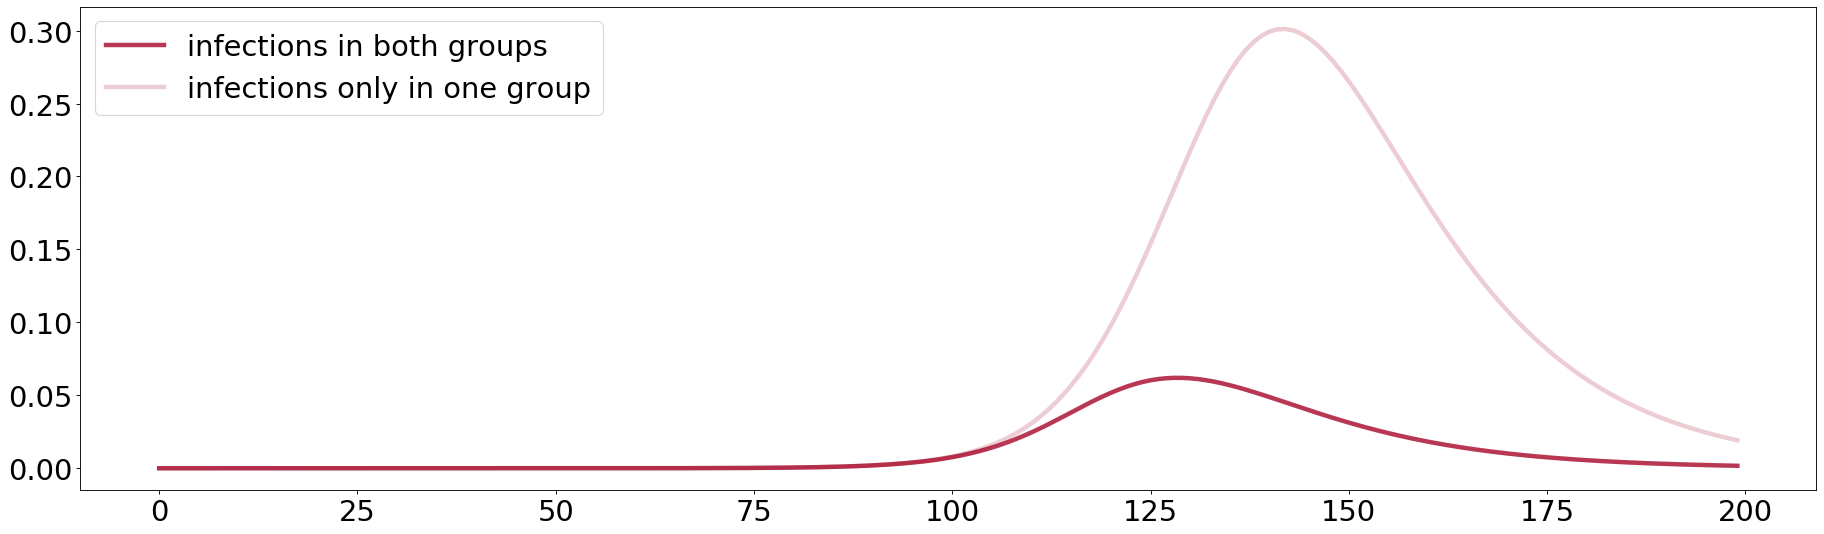

In [5]:
# get new population for two kind of spreaders
rN=0.2; brN=1-rN
rC=0; M=8
Ni1 = np.zeros(M);  Ni1[0:4] = rN*Ni;   Ni1[4:8] = brN*Ni;

CMS = np.zeros((M, M))
CMS[0:4,0:4] = CH + CW + CS + CO  
CMS[4:8,0:4] = (CO)*rC/(rN)  
CMS[0:4,4:8] = (CO)*rC/(brN)  
CMS[4:8,4:8] = (CH + CW + CS + CO)  
def contactMatrix(t):    return CMS
print(CMS)

# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:4]=2; 
E_0  = np.zeros((M)); E_0[0:4]=4;  
x0 = np.concatenate(( Ni1-(Is_0 + E_0), E_0, Is_0*0, Is_0))
Is1 = get_data(contactMatrix, x0)
 
Is_0 = np.zeros((M));  Is_0[0:8]=1; 
E_0  = np.zeros((M));  E_0[0:8]=2;  
x0 = np.concatenate(( Ni1-(Is_0 + E_0), E_0, Is_0*0, Is_0))
Is2 = get_data(contactMatrix, x0)


fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.sum(Is1, axis=1)/N, '-', lw=4, color='#A60628', label='infections in both groups', alpha=0.8); 
plt.plot(np.sum(Is2, axis=1)/N, '-', lw=4, color='#A60628', label='infections only in one group', alpha=0.2); 
plt.legend()

We can see that initial condition makes a difference. Keeping the number of infections constant, we confine them to one group or both. Also if there are infected people in each group and $r^C=0$, implies that the dynamics is same as it would have been without the partionting since two compartment values add-up!

In [6]:
# get new population for two kind of spreaders
rN=0.2; brN=1-rN
rC=0.1; M=8

Ni1 = np.zeros(M);  Ni1[0:4] = rN*Ni;   Ni1[4:8] = brN*Ni;

CMS = np.zeros((M, M))
CMS[0:4,0:4] = CH + CW + CS + CO  
CMS[4:8,0:4] = (CO)*rC/(rN)  
CMS[0:4,4:8] = (CO)*rC/(brN)  
CMS[4:8,4:8] = (CH + CW + CS + CO)  
def contactMatrix(t):    return CMS
print(CMS)

# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:4]=2; 
E_0  = np.zeros((M)); E_0[0:4]=4;  
x0 = np.concatenate(( Ni1-(Is_0 + E_0), E_0, Is_0*0, Is_0))
IsC2 = get_data(contactMatrix, x0)

[[14.3   4.35  1.95  0.37  0.85  0.28  0.12  0.03]
 [ 4.38  8.04  3.1   0.34  0.21  0.52  0.12  0.02]
 [ 3.23  4.26  3.41  0.34  0.07  0.16  0.1   0.02]
 [ 1.68  2.03  1.33  0.44  0.02  0.07  0.05  0.03]
 [ 3.4   1.11  0.47  0.11 14.3   4.35  1.95  0.37]
 [ 0.85  2.1   0.49  0.07  4.38  8.04  3.1   0.34]
 [ 0.27  0.62  0.39  0.07  3.23  4.26  3.41  0.34]
 [ 0.09  0.28  0.2   0.11  1.68  2.03  1.33  0.44]]


In [7]:
# get new population for two kind of spreaders
rN=0.2; brN=1-rN
rC=1; M=8

Ni1 = np.zeros(M);  Ni1[0:4] = rN*Ni;   Ni1[4:8] = brN*Ni;

CMS = np.zeros((M, M))
CMS[0:4,0:4] = CH + CW + CS + CO  
CMS[4:8,0:4] = (CO)*rC/(rN)  
CMS[0:4,4:8] = (CO)*rC/(brN)  
CMS[4:8,4:8] = (CH + CW + CS + CO)  
def contactMatrix(t):    return CMS
print(CMS)

# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:4]=2; 
E_0  = np.zeros((M)); E_0[0:4]=4;  
x0 = np.concatenate(( Ni1-(Is_0 + E_0), E_0, Is_0*0, Is_0))
IsC3 = get_data(contactMatrix, x0)

[[14.3   4.35  1.95  0.37  8.5   2.78  1.17  0.26]
 [ 4.38  8.04  3.1   0.34  2.14  5.25  1.22  0.18]
 [ 3.23  4.26  3.41  0.34  0.67  1.55  0.98  0.18]
 [ 1.68  2.03  1.33  0.44  0.24  0.71  0.51  0.27]
 [34.   11.12  4.67  1.05 14.3   4.35  1.95  0.37]
 [ 8.55 20.99  4.88  0.73  4.38  8.04  3.1   0.34]
 [ 2.7   6.21  3.9   0.73  3.23  4.26  3.41  0.34]
 [ 0.94  2.83  2.03  1.09  1.68  2.03  1.33  0.44]]


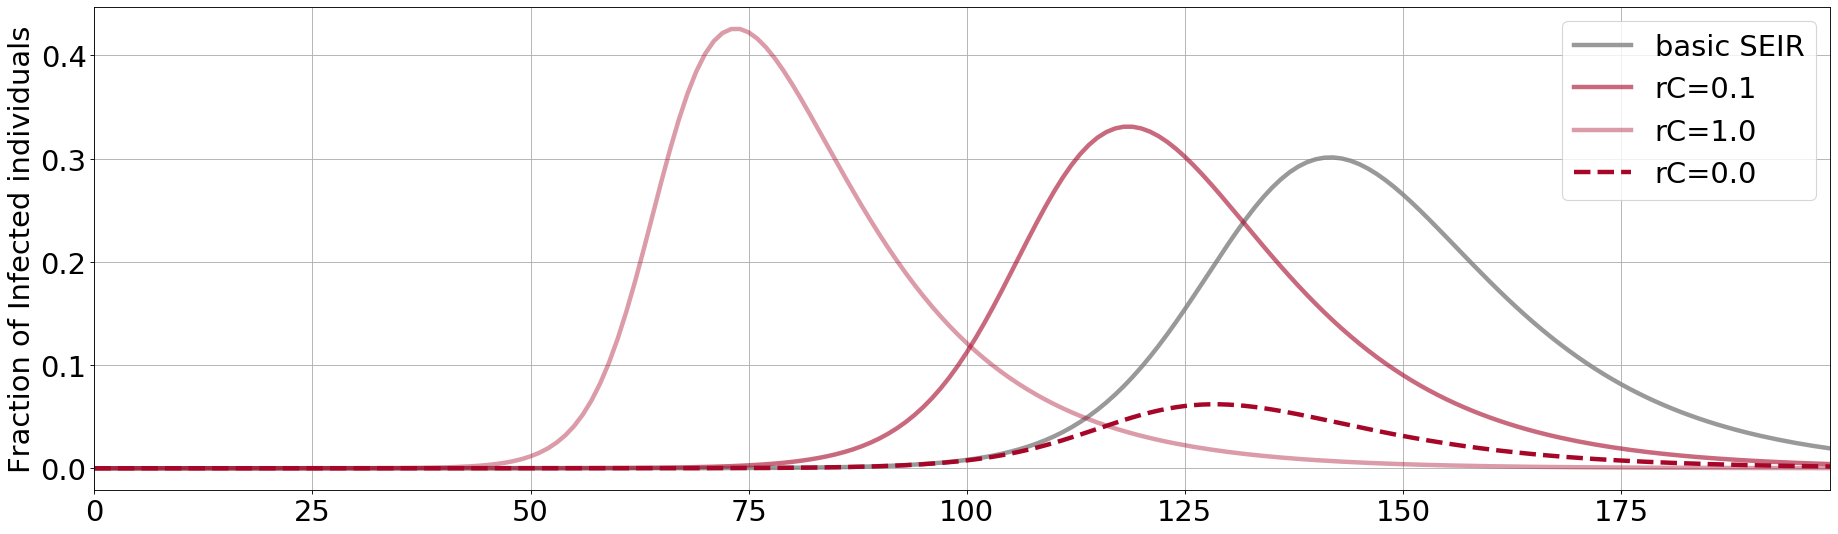

In [8]:
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
 
plt.plot(np.sum(Is2, axis=1)/N, '-', lw=4, color='gray', label='basic SEIR', alpha=0.8)
plt.plot(np.sum(IsC2, axis=1)/N, '-', lw=4, color='#A60628', label='rC=0.1', alpha=0.6)
plt.plot(np.sum(IsC3, axis=1)/N, '-', lw=4, color='#A60628', label='rC=1.0', alpha=0.4)
plt.plot(np.sum(Is1, axis=1)/N, '--', lw=4, color='#A60628', label='rC=0.0', alpha=1)


plt.legend(fontsize=26, loc='upper right'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Fraction of Infected individuals');


The initial condition is chosen such that the infection is only seeded in only one of the subc-compartments. If the two classes do not talk, then the infection is only confined to this class, else it runs to the whole population...